In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn. preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn. preprocessing import StandardScaler

In [ ]:
path = r'https://drive.google.com/uc?export=download&id=1xxDtrZKfuWQfl-6KA9XEd_eatitNPnkB'
df = pd.read_csv(path)

In [ ]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5696, 107)
(1424, 107)
(5696,)
(1424,)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
model.score(X_train_poly, y_train)

1.0

In [ ]:
y_pred = model.predict(X_test_poly)
y_pred

array([47. , 60. , 65. , ..., 56.5, 26. , 49. ])

In [ ]:
y_test

,price
960,47.0
132,60.0
2431,65.0
2229,325.0
4503,60.0
...,...
4970,48.0
553,205.0
1397,56.5
4056,26.0


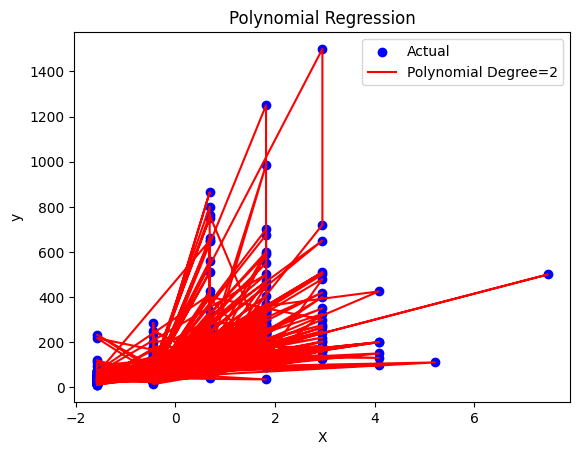

In [ ]:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual') # Use the first column of X_test for scatter plot
plt.plot(X_test[:, 0], y_pred, color='red', label=f"Polynomial Degree={degree}") # Use the first column of X_test for line plot
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression")
plt.show()

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score


# Define a pipeline (Polynomial + Linear Regression)
pipeline = Pipeline([
    ("poly_features", PolynomialFeatures()),
    ("lin_reg", LinearRegression())
])

# Define hyperparameter grid (degrees to test)
param_grid = {'poly_features__degree': [1, 2, 3]}  # Testing polynomial degrees

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

# Best degree
best_degree = grid_search.best_params_['poly_features__degree']
print(f"Best Polynomial Degree: {best_degree}")

# Best model
best_model = grid_search.best_estimator_

# Predict using the best model

y_pred = best_model.predict(X_test)

# Visualization
plt.scatter(X, y, color='blue', label="Original Data")
plt.plot(X_test, y_pred, color='red', label=f"Best Fit (Degree={best_degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Optimized Polynomial Regression")
plt.show()


NameError: name 'PolynomialFeatures' is not defined

In [ ]:
### Another

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn. preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn. preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('BostonHousing.csv')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X = df.drop('medv', axis=1)
y = df['medv']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
model.score(X_train_poly, y_train)

0.94093170271135

In [ ]:
X_test_poly[0, :]


array([ 1.        , -0.39680933, -0.50032012, ..., -0.00474602,
        0.00532521, -0.00597509])

In [ ]:
model.predict([X_test_poly[0, :]])

array([27.02066528])

In [ ]:
y_pred = model.predict(X_test_poly)
y_pred

array([ 2.78719102e+01,  3.15994124e+01, -1.92158896e+01,  1.21858552e+01,
        1.64291223e+01,  2.29891772e+01,  2.22609214e+01,  1.19416610e+01,
        2.07780871e+01,  2.04100346e+01,  2.68232679e+01,  2.23739033e+01,
       -1.61134574e+03,  2.43534627e+01,  1.66754369e+01,  2.14585805e+01,
        2.18746749e+01,  2.40241445e+01,  1.13085065e+02,  8.95779589e+00,
        3.43895004e+01,  2.73877968e+01,  1.13107736e+01,  3.08398635e+01,
        1.32087200e+01,  1.18678922e+01,  2.33058793e+01, -8.44436142e+00,
        2.16703752e+01,  1.98304156e+01,  2.55853246e+01,  2.36590811e+01,
       -6.80331831e-01,  3.05899994e+01,  1.49844135e+01,  2.22112614e+01,
        2.79233854e+01,  1.85459279e+01,  2.35730456e+01,  1.15891237e+01,
        1.43708445e+01,  2.98212448e+01,  2.10408905e+02,  2.79719663e+01,
        2.34507316e+01,  1.11685516e+01,  1.60875636e+01,  1.65659133e+01,
        2.02037443e+01,  2.94489076e+00,  2.52504878e+01,  2.57763821e+01,
        1.55341539e+01,  

In [ ]:
y_test

,medv
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


In [ ]:
Predict_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
Predict_df

,Predicted,Actual
173,27.871910,23.6
274,31.599412,32.4
491,-19.215890,13.6
72,12.185855,22.8
452,16.429122,16.1
...,...,...
412,-438.183203,17.9
436,7.162112,9.6
411,26.831028,17.2
86,23.430924,22.5


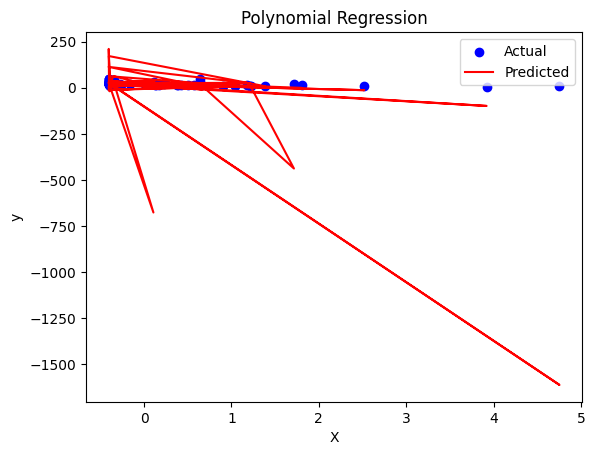

In [ ]:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.plot(X_test[:, 0], y_pred, color='red', label='Predicted') # Use X_test instead of X_tes, and y_pred instead of y
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression')
plt.show()

In [ ]:
### Another

In [ ]:
Data = {'ID': [111,112,113,114,115,116,117,118],
        'salary': [10000,13000,17000,12000,15000,16000,18000,19000]}


In [ ]:
df = pd.DataFrame(Data)

In [ ]:
X = df.drop('salary', axis=1)
y = df['salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.7508856358979672

In [ ]:
y_test

,medv
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5
